In [1]:
%load_ext autoreload

%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sweep import Sweep
from actionpotential import AP
import os
import seaborn as sns
from scipy import stats

import scikit_posthocs as sp
import json

In [2]:
data_ap = AP('14 dpi/Single/2022-03-29_001_03.asc')

In [3]:
len(data_ap.time[0])*3.09635

25003.026250000003

In [4]:
1/data_ap.time[0][-1]

3.0963586821897446

In [5]:
# of first ap
def get_ap_properties(data, properties = ['firing_threshold', 'amplitude_max', 'amplitude_min', 'spike_width_0mV', 'spike_width']):
    values = []
    for properti in properties:
        attribute = getattr(data, properti)
        if data.true_ap[-1] == True :
            values.append(np.array(attribute)[np.isfinite(attribute)][0])
        else:
            values.append(np.nan)
    return dict(zip(properties, values))

In [6]:
# of first ap
def get_ap_properties(data, properties = ['firing_threshold', 'amplitude_max', 'amplitude_min', 'spike_width_0mV', 'spike_width']):
    values = []
    for properti in properties:
        attribute = getattr(data, properti)
        if data.true_ap[-1] == True :
            where_first_ap = (np.argwhere(np.isnan(attribute)).max()+1)
            values.append(np.float64(attribute[where_first_ap]))
            plot = True
        else:
            values.append(np.nan)
            plot = False
    
    if plot:
        plt.plot(data.voltage_filtered[where_first_ap][200:1000])
        plt.scatter(data.firing_start[where_first_ap]-200, data.firing_threshold[where_first_ap], c='r')
        plt.show()
        print(data.firing_start[where_first_ap]-np.argmax(data.voltage_derivative[where_first_ap]))
        
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ax1.plot(data.voltage_derivative[where_first_ap][200:1000], c='C0')
        ax2.plot(data.stimulus[where_first_ap][200:1000], c='C1')
        plt.show()
    else:
        plt.plot(data.voltage_filtered[-1][200:1000])
        plt.show()
        
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ax1.plot(data.voltage_derivative[-1][200:1000], c='C0')
        ax2.plot(data.stimulus[-1][200:1000], c='C1')
        plt.show()
    return dict(zip(properties, values))

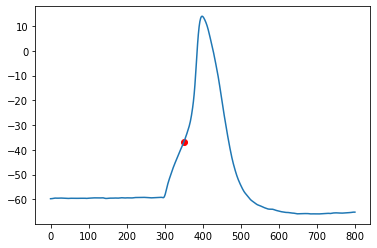

-32


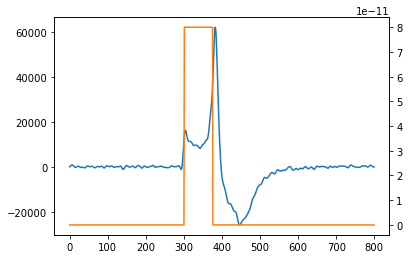

{'firing_threshold': -36.87454388,
 'amplitude_max': 13.88659701,
 'amplitude_min': -66.33664668,
 'spike_width_0mV': 1.6800000000000002,
 'spike_width': 3.0}

In [7]:
get_ap_properties(data_ap)

In [22]:
dpi14_path = '14 dpi/Single/'
dpi15_path = '15 dpi/Single/'
dpi16_path = '16 dpi/Single/'
dpi17_path = '17 dpi/Single/'
drg_path = 'DRG/Single'

In [23]:
def get_ap_properties_all(path):
    ap_properies_all = []
    for filename in os.listdir(path):
        filepath = os.path.join(path, filename)
        print(filepath)
        data_ap = AP(filepath)
        ap_properies = get_ap_properties(data_ap)
        ap_properies_all.append(ap_properies)
    return ap_properies_all

14 dpi/Single/2022-03-29_001_01.asc


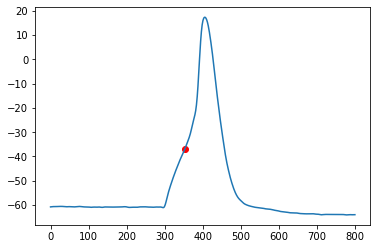

-37


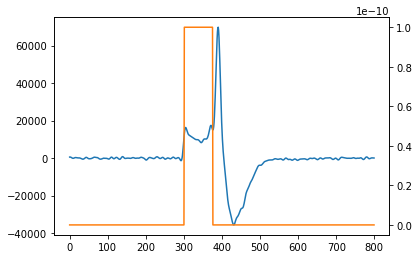

14 dpi/Single/2022-03-29_001_02.asc


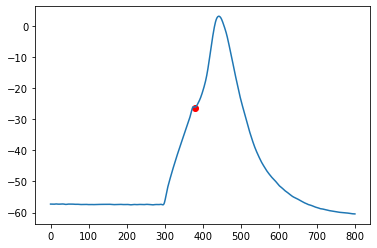

-40


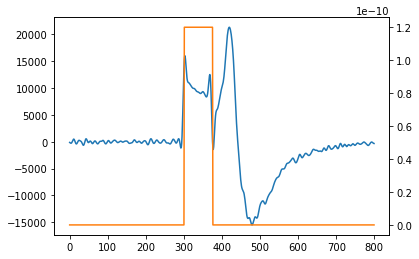

14 dpi/Single/2022-03-29_001_03.asc


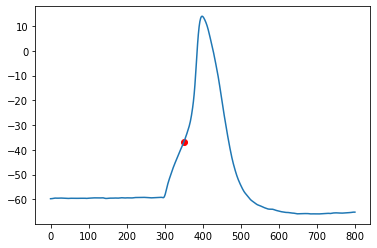

-32


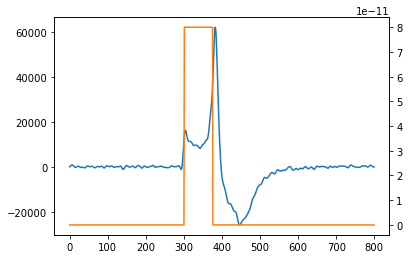

14 dpi/Single/2022-03-29_001_04.asc


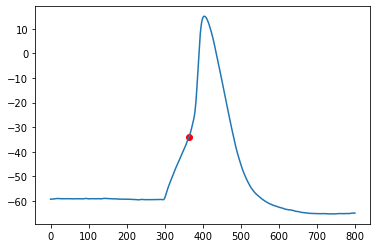

-22


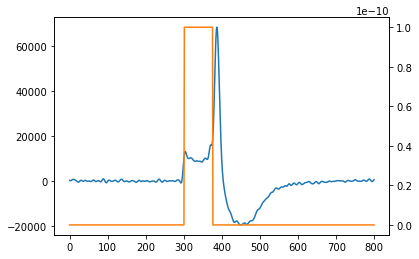

14 dpi/Single/2022-03-29_001_05.asc


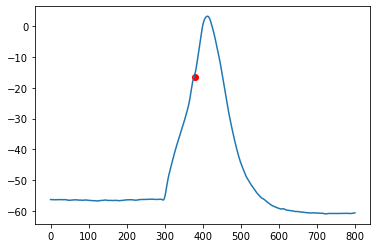

-14


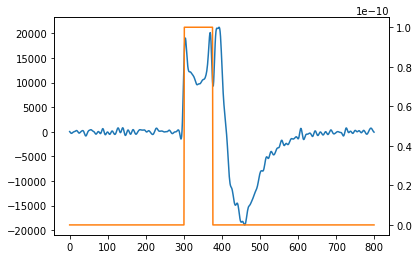

14 dpi/Single/2022-03-29_001_06.asc


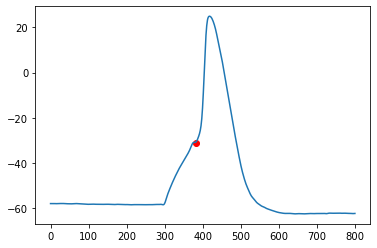

-22


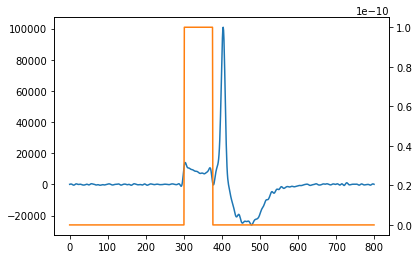

14 dpi/Single/2022-03-29_001_07.asc


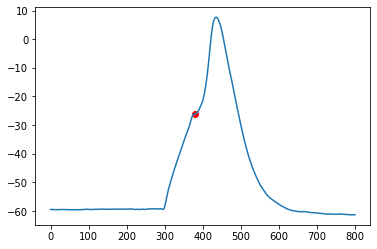

-37


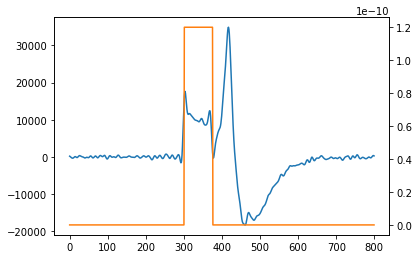

14 dpi/Single/2022-03-29_001_08.asc


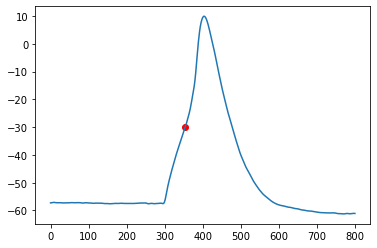

-31


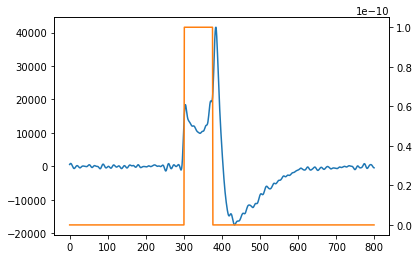

14 dpi/Single/2022-03-29_001_09.asc


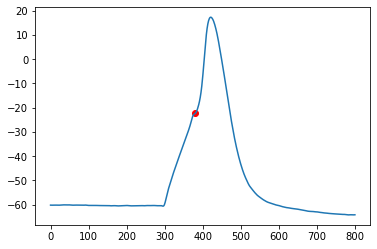

-23


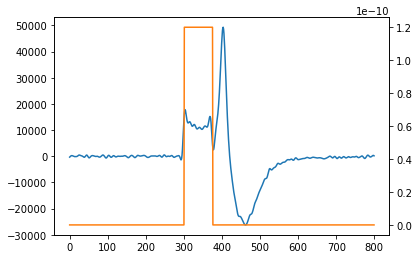

14 dpi/Single/2022-03-29_001_10.asc


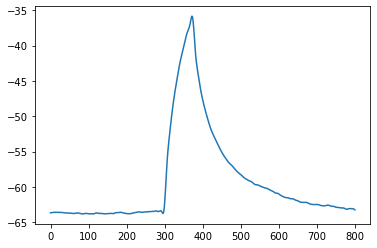

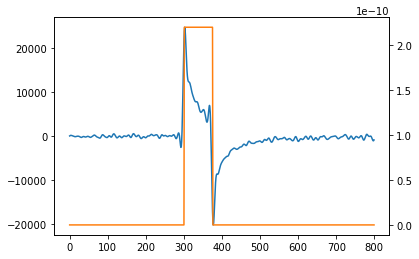

14 dpi/Single/2022-03-29_001_12.asc


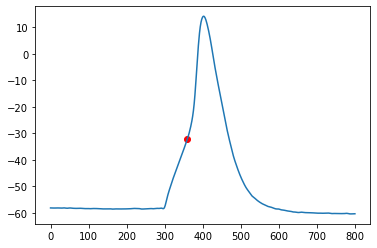

-24


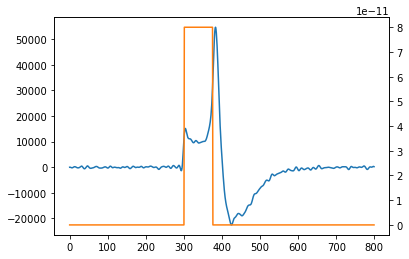

14 dpi/Single/2022-03-29_001_14.asc


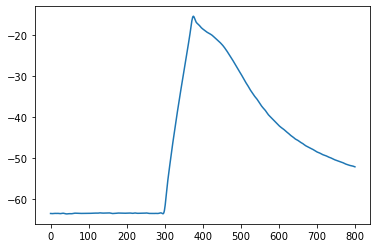

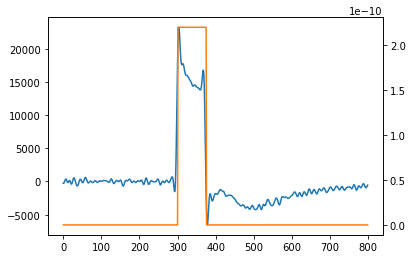

14 dpi/Single/2022-03-29_001_15.asc


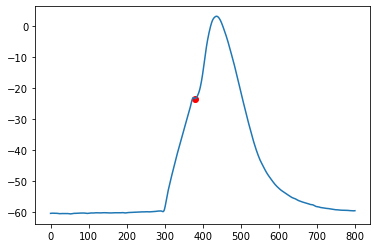

-25


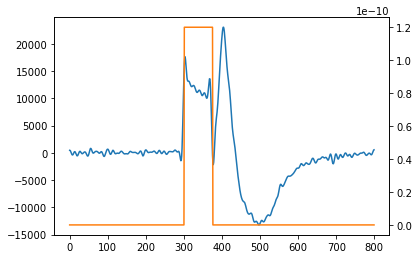

14 dpi/Single/2022-03-29_001_16.asc


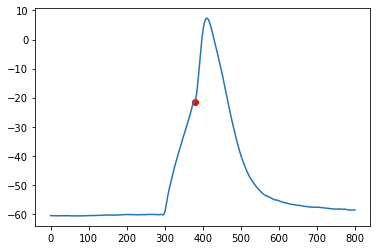

-12


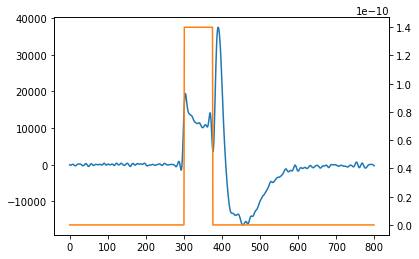

14 dpi/Single/2022-03-29_001_18.asc


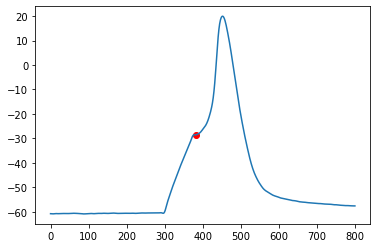

-52


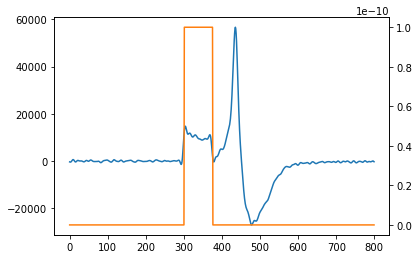

14 dpi/Single/2022-03-29_001_19.asc


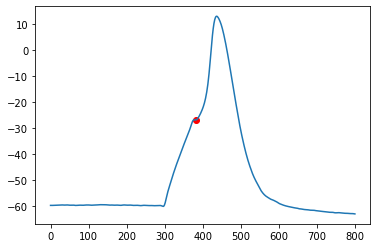

-39


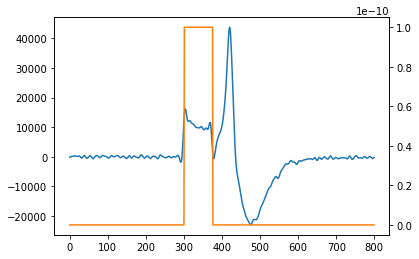

14 dpi/Single/2022-03-29_001_20.asc


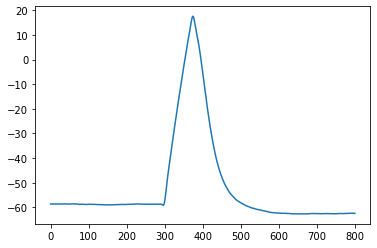

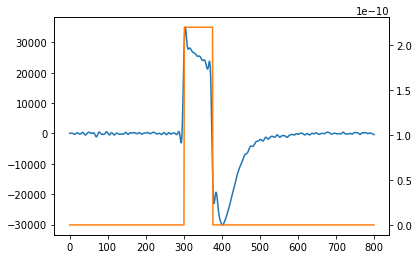

15 dpi/Single/2022-03-30_001_04.asc


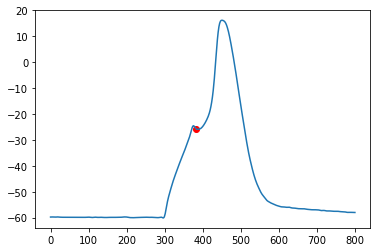

-52


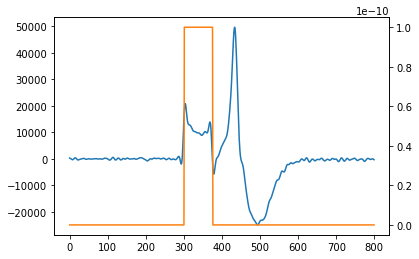

15 dpi/Single/2022-03-30_001_05.asc


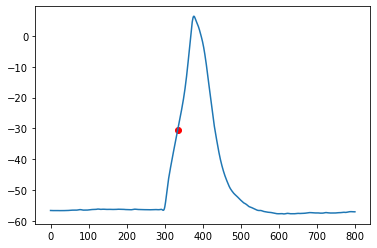

-31


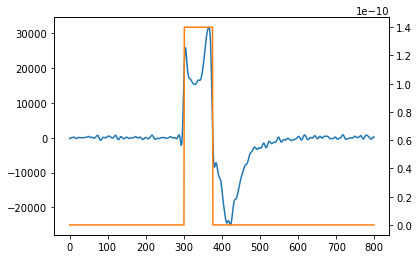

15 dpi/Single/2022-03-30_001_07.asc


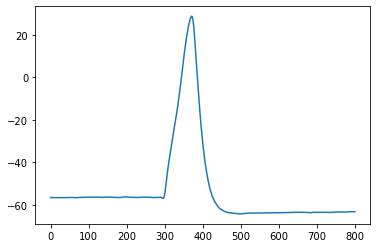

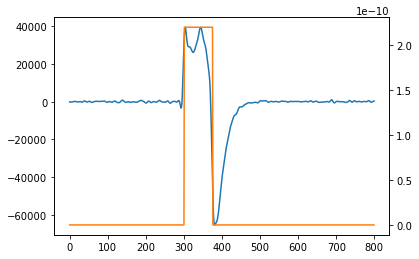

15 dpi/Single/2022-03-30_001_09.asc


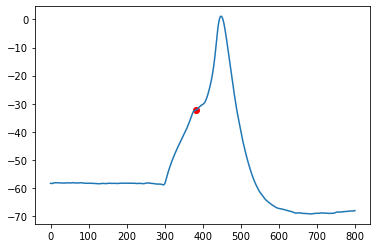

-52


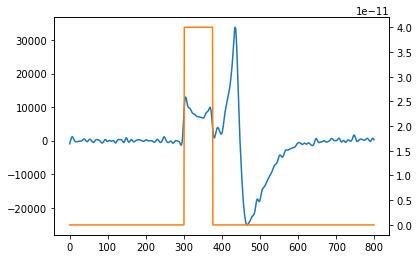

15 dpi/Single/2022-03-30_001_11.asc


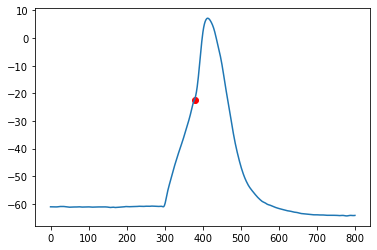

-14


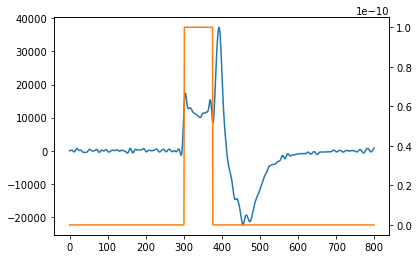

15 dpi/Single/2022-03-30_001_12.asc


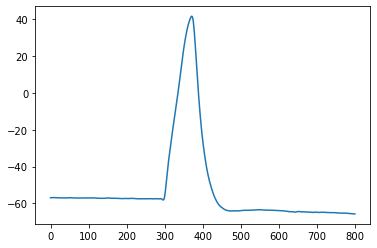

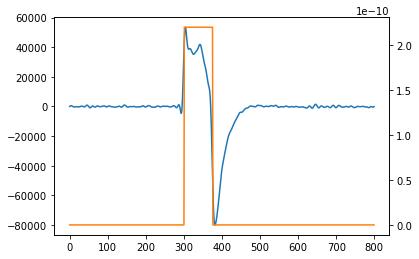

15 dpi/Single/2022-03-30_001_13.asc


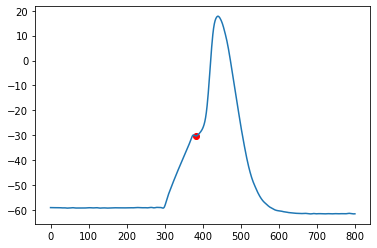

-37


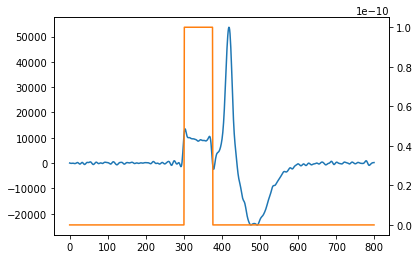

15 dpi/Single/2022-03-30_001_14.asc


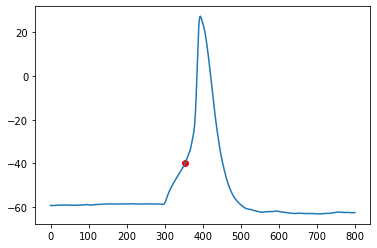

-31


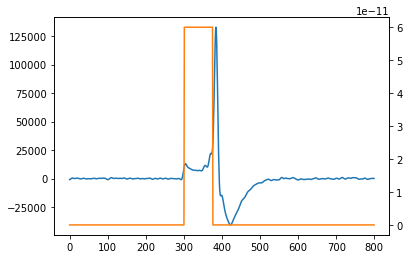

15 dpi/Single/2022-03-30_001_15.asc


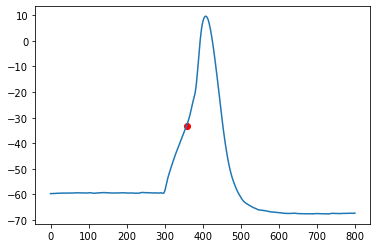

-30


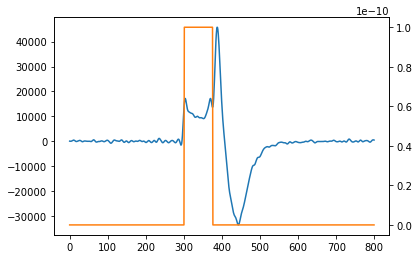

15 dpi/Single/2022-03-30_001_16.asc


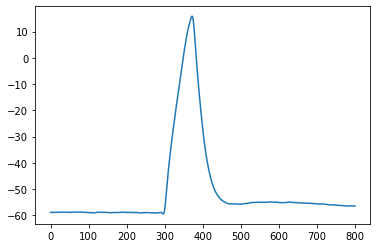

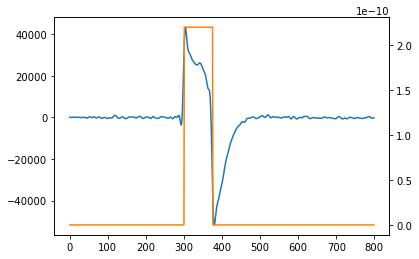

15 dpi/Single/2022-03-30_001_17.asc


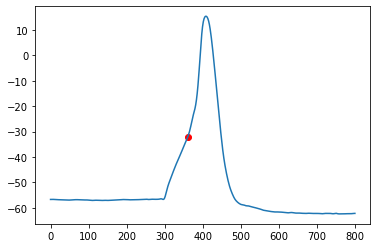

-32


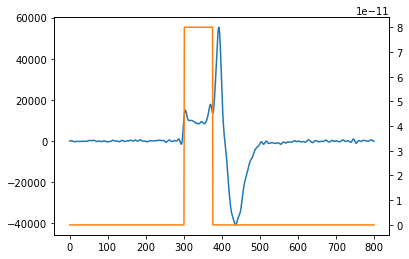

15 dpi/Single/2022-03-30_001_18.asc


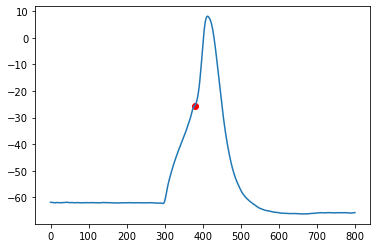

-18


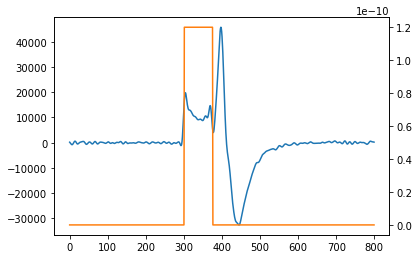

15 dpi/Single/2022-03-30_001_20.asc


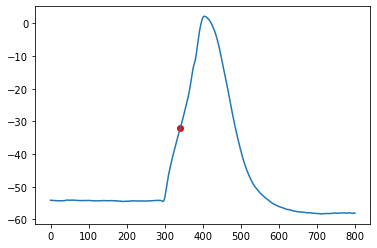

-44


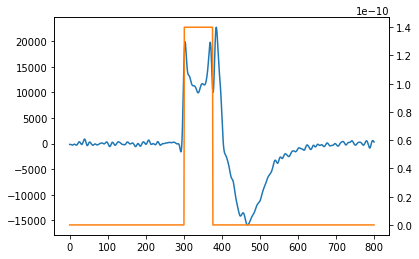

15 dpi/Single/2022-03-30_001_21.asc


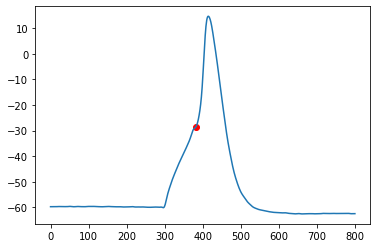

-21


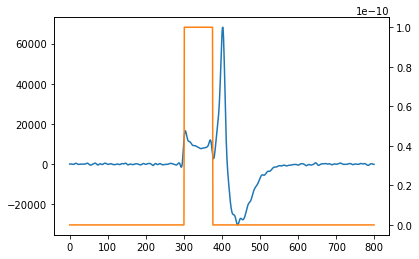

15 dpi/Single/2022-03-30_001_23.asc


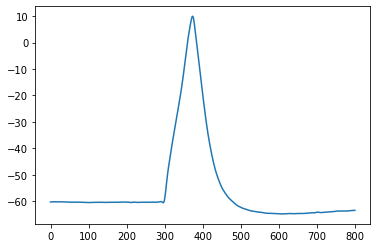

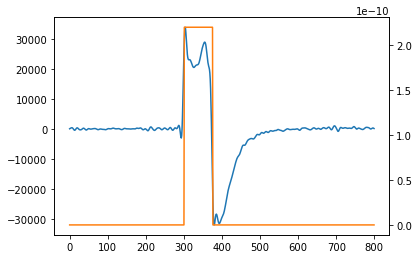

15 dpi/Single/2022-03-30_001_24.asc


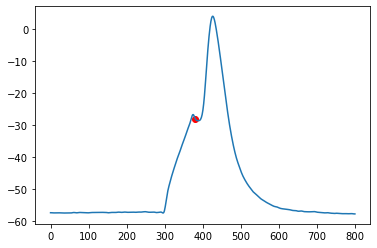

-28


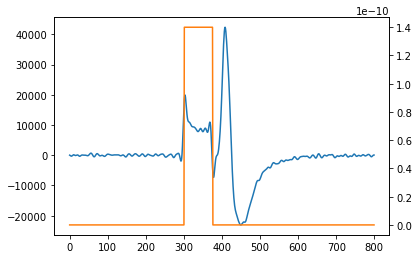

16 dpi/Single/2022-04-06_001_02.asc


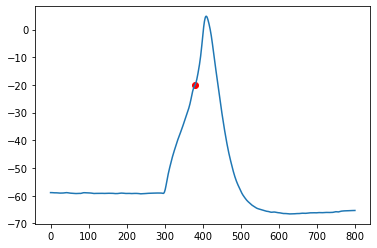

-19


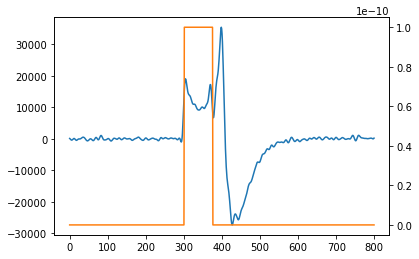

16 dpi/Single/2022-04-06_001_03.asc


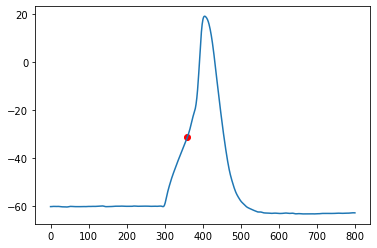

-32


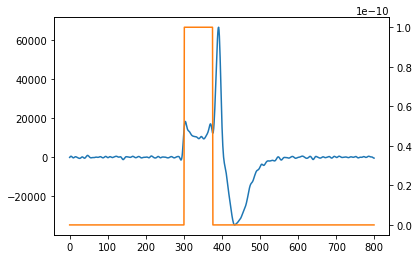

16 dpi/Single/2022-04-06_001_04.asc


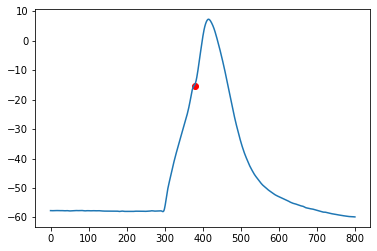

-13


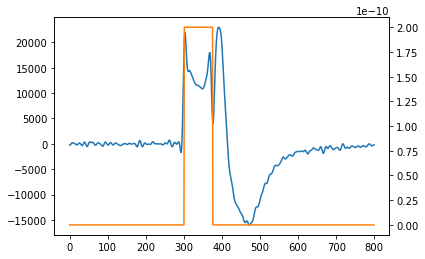

16 dpi/Single/2022-04-06_001_08.asc


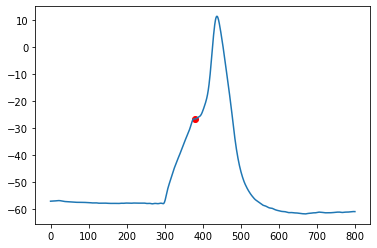

-43


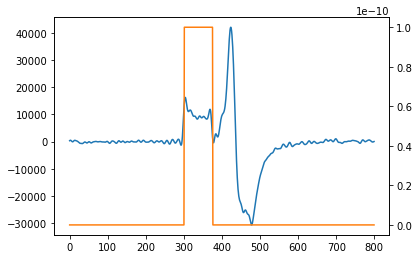

16 dpi/Single/2022-04-06_001_10.asc


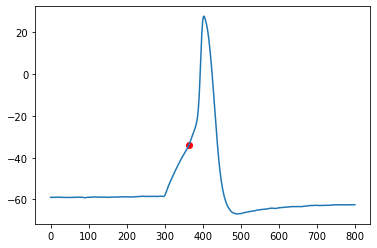

-30


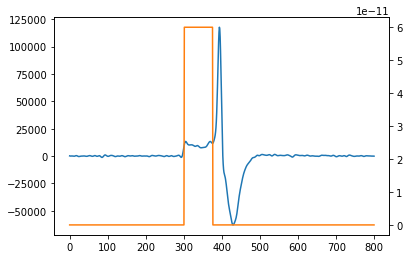

16 dpi/Single/2022-04-06_001_11.asc


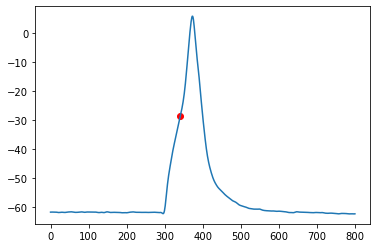

-18


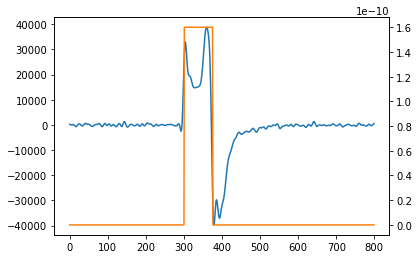

16 dpi/Single/2022-04-06_001_12.asc


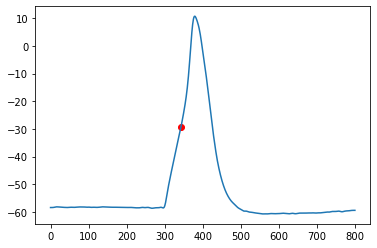

-25


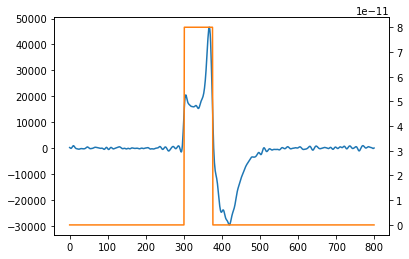

16 dpi/Single/2022-04-06_001_13.asc


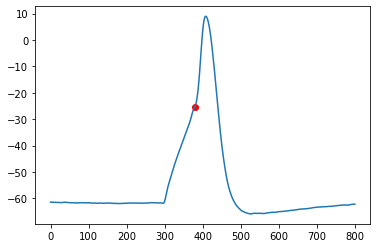

-15


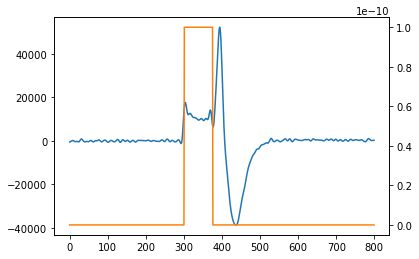

16 dpi/Single/2022-04-06_001_15.asc


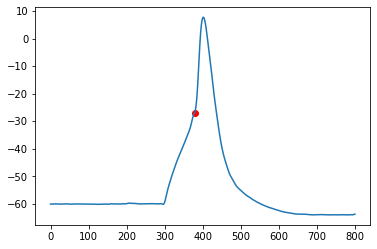

-11


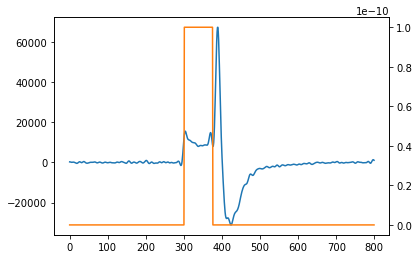

16 dpi/Single/2022-04-06_001_16.asc


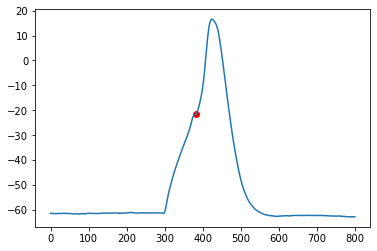

-26


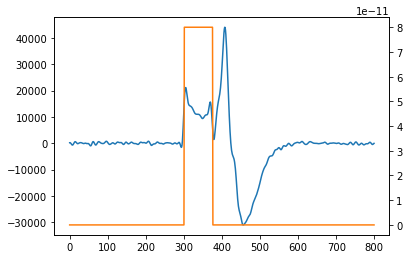

16 dpi/Single/2022-04-13_001_01.asc


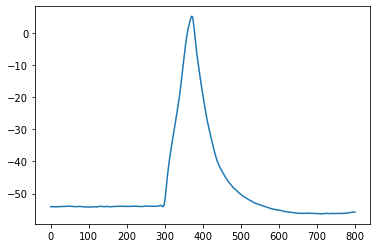

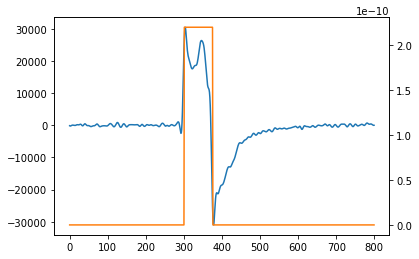

16 dpi/Single/2022-04-13_001_03.asc


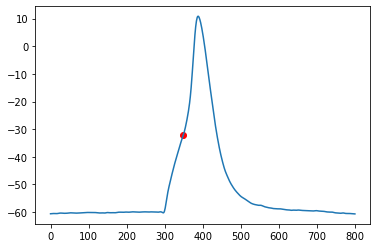

-25


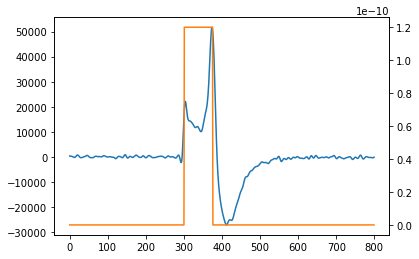

16 dpi/Single/2022-04-13_001_04.asc


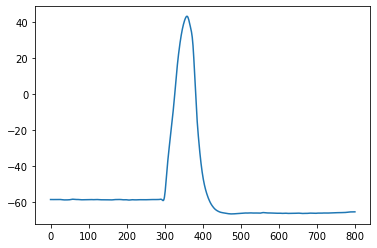

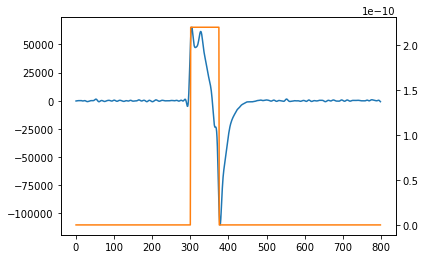

16 dpi/Single/2022-04-13_001_05.asc


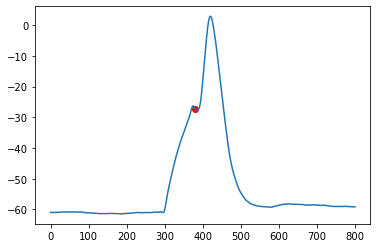

-21


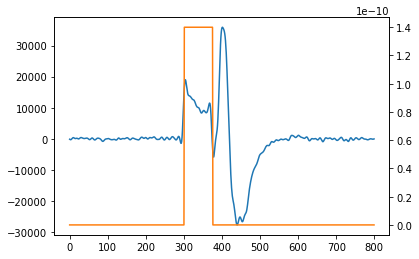

16 dpi/Single/2022-04-13_001_06.asc


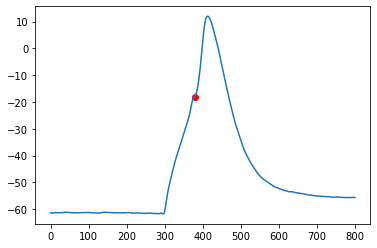

-18


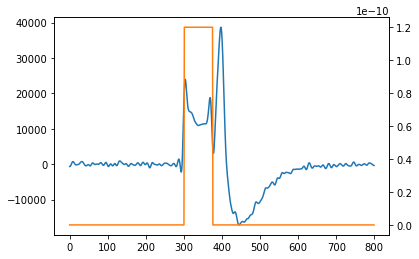

16 dpi/Single/2022-04-13_001_07.asc


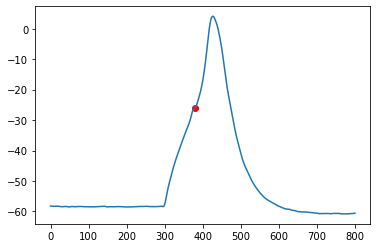

-32


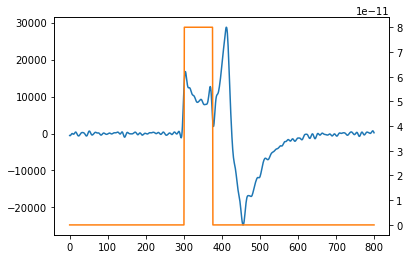

16 dpi/Single/2022-04-13_001_08.asc


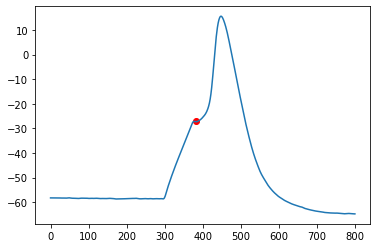

-45


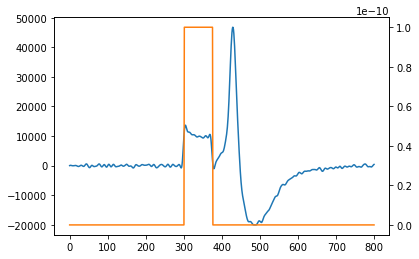

16 dpi/Single/2022-04-13_001_09.asc


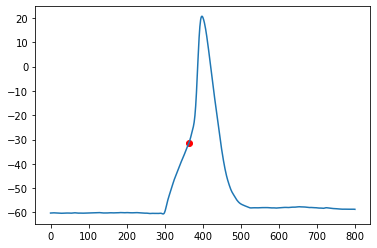

-22


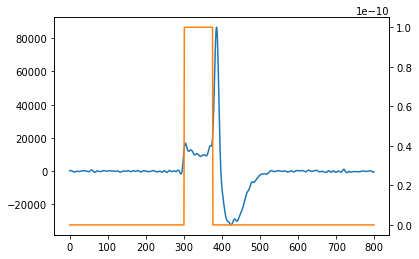

16 dpi/Single/2022-04-13_001_10.asc


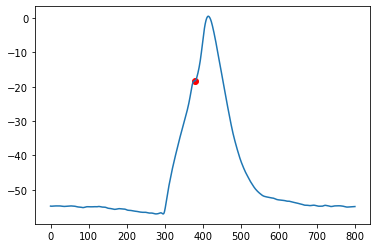

-19


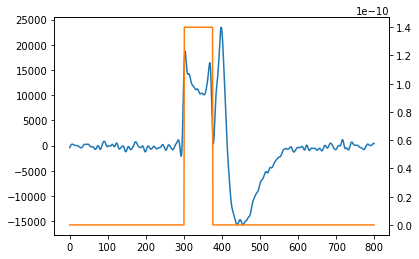

16 dpi/Single/2022-04-13_001_12.asc


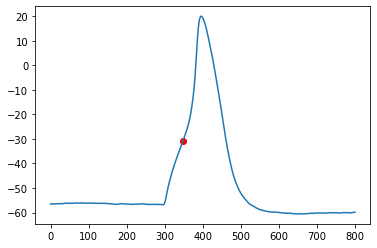

-34


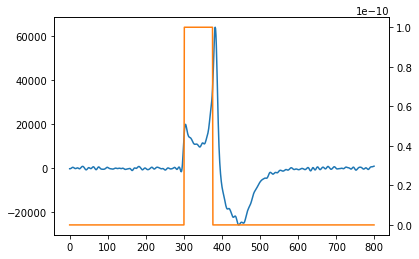

17 dpi/Single/2022-04-07_001_01.asc


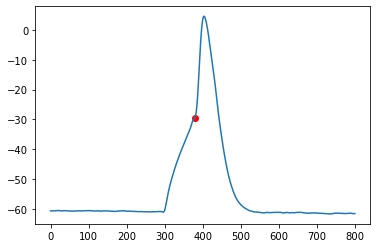

-11


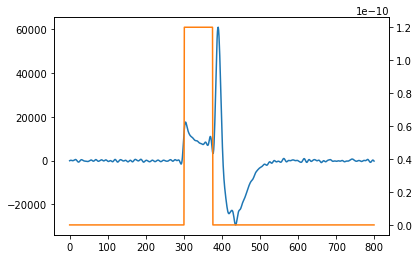

17 dpi/Single/2022-04-07_001_02.asc


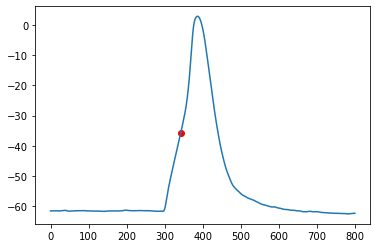

-27


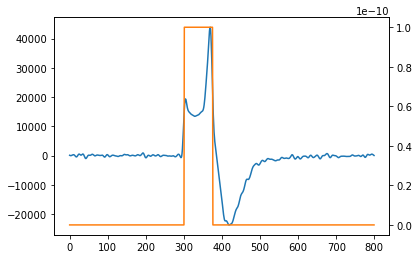

17 dpi/Single/2022-04-07_001_04.asc


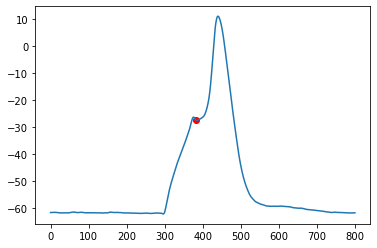

-44


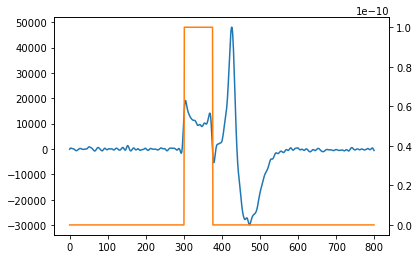

17 dpi/Single/2022-04-07_001_06.asc


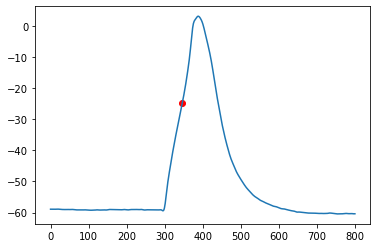

-22


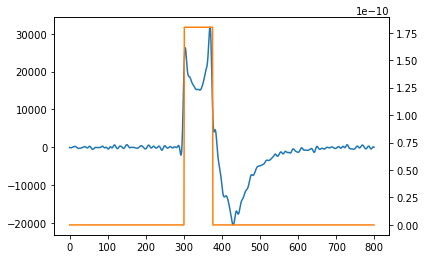

17 dpi/Single/2022-04-07_001_08.asc


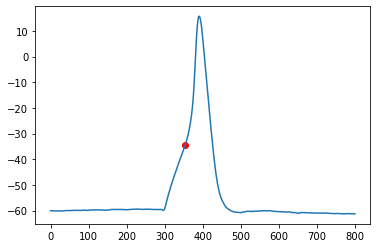

-25


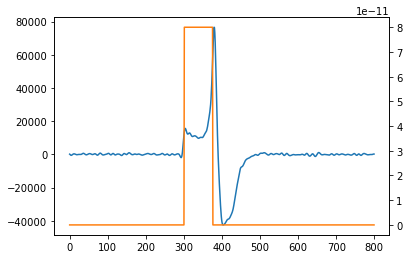

17 dpi/Single/2022-04-07_001_09.asc


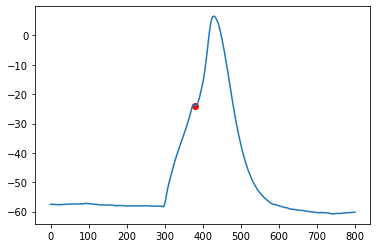

-31


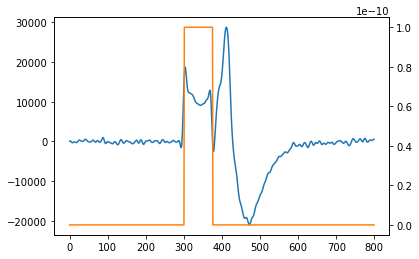

17 dpi/Single/2022-04-14_001_04.asc


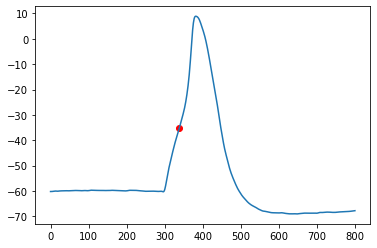

-31


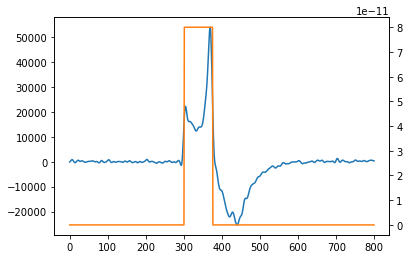

17 dpi/Single/2022-04-14_001_05.asc


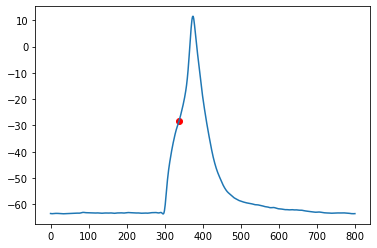

-27


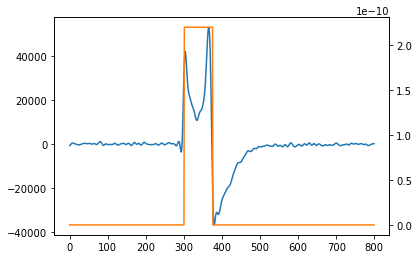

17 dpi/Single/2022-04-14_001_06.asc


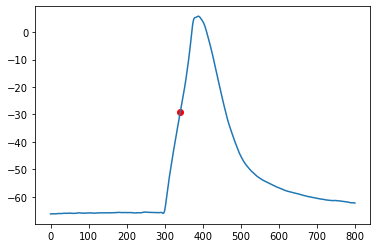

-27


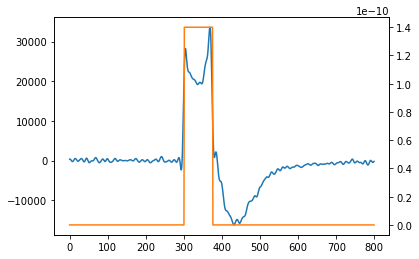

17 dpi/Single/2022-04-14_001_07.asc


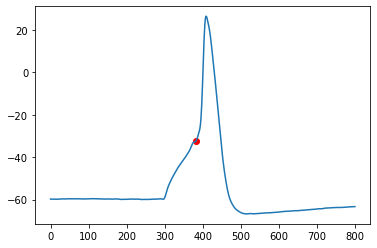

-19


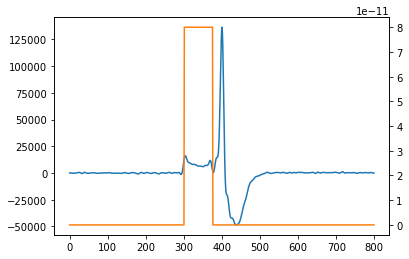

17 dpi/Single/2022-04-14_001_10.asc


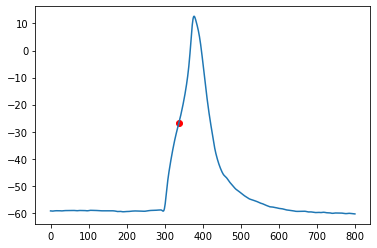

-31


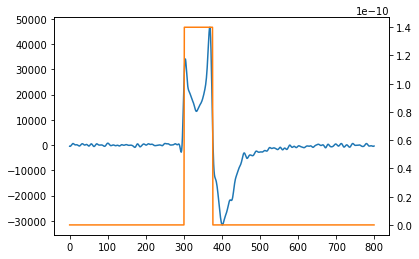

17 dpi/Single/2022-04-14_001_11.asc


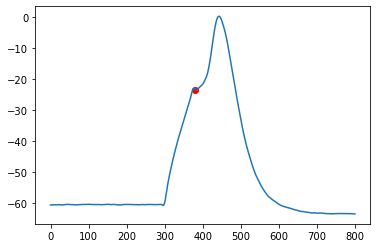

-44


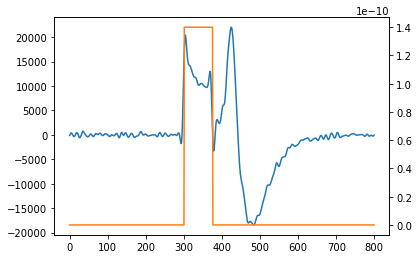

17 dpi/Single/2022-04-14_001_13.asc


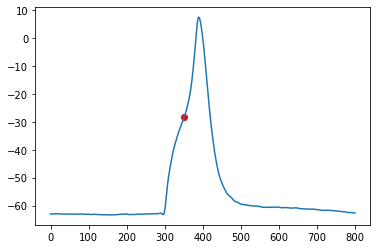

-29


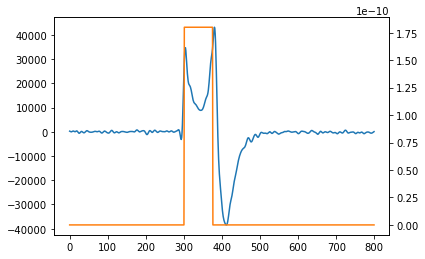

17 dpi/Single/2022-04-14_001_14.asc


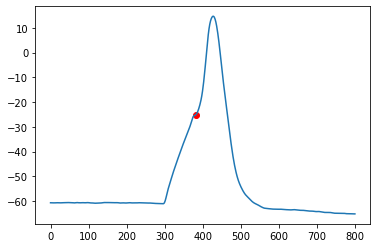

-27


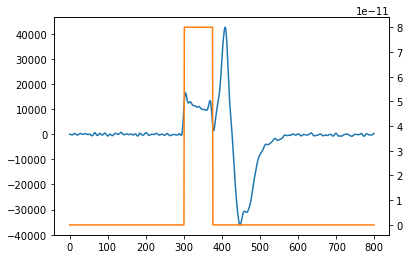

17 dpi/Single/2022-04-14_001_15.asc


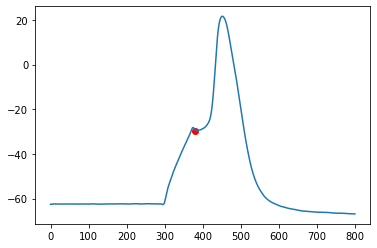

-52


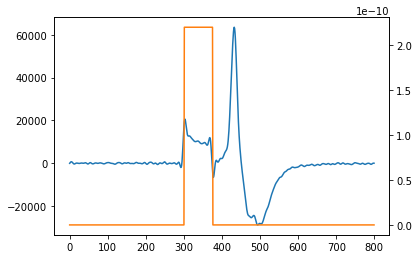

17 dpi/Single/2022-04-14_001_16.asc


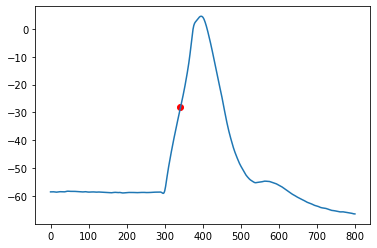

-28


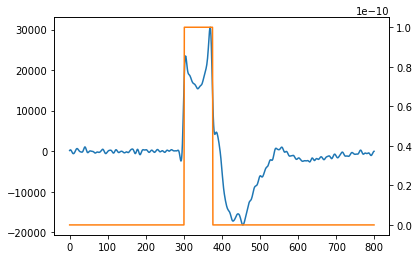

17 dpi/Single/2022-04-14_001_17.asc


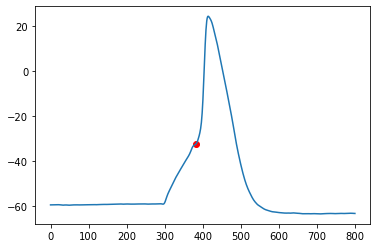

-21


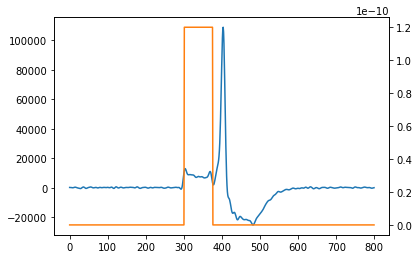

17 dpi/Single/2022-04-14_001_18.asc


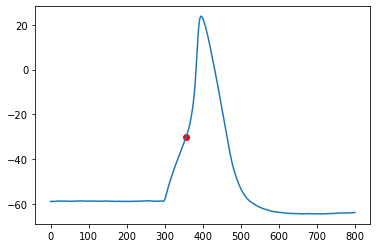

-27


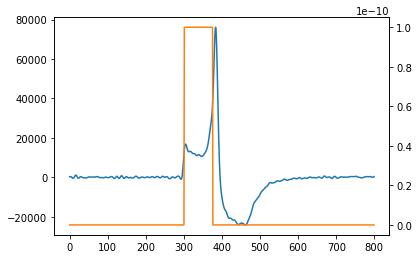

17 dpi/Single/2022-04-14_001_19.asc


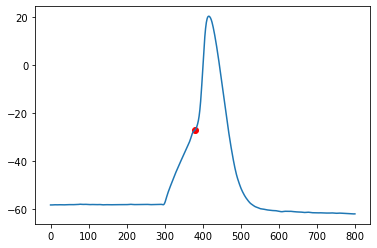

-19


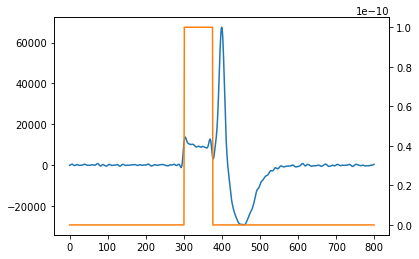

DRG/Single\2022-03-10_001_2.asc


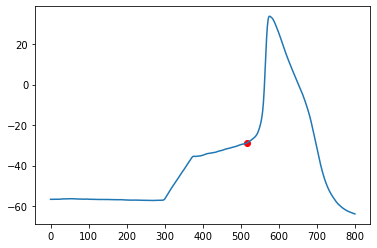

-49


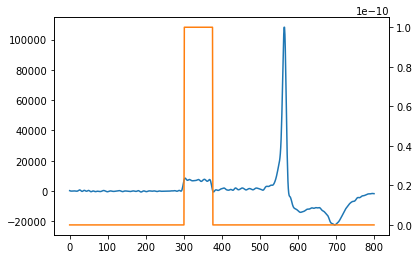

DRG/Single\2022-03-10_001_3.asc


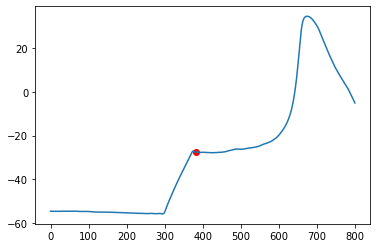

-271


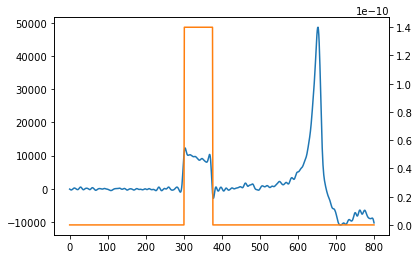

DRG/Single\2022-03-17_001_2.asc


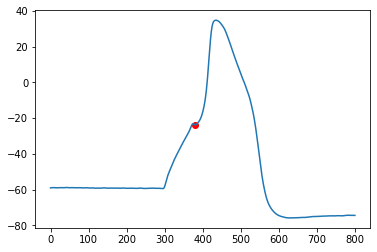

-36


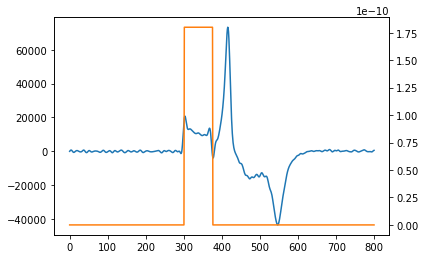

DRG/Single\2022-03-17_001_3.asc


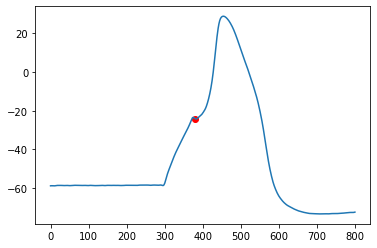

-52


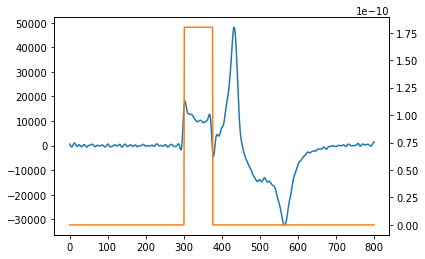

DRG/Single\2022-03-23_001_1.asc


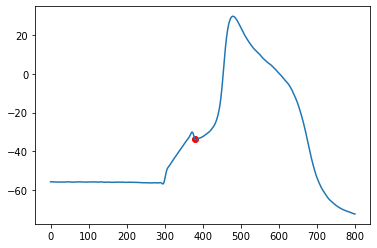

-76


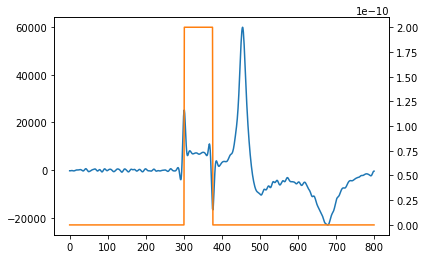

DRG/Single\2022-03-23_001_6.asc


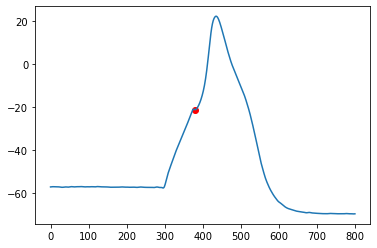

-35


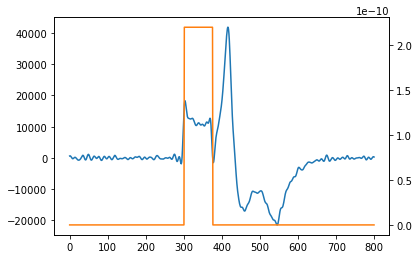

DRG/Single\2022-03-23_001_7.asc


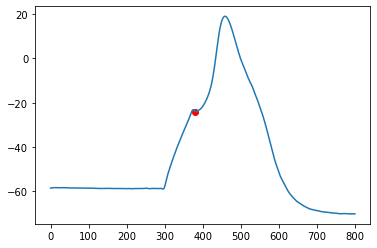

-56


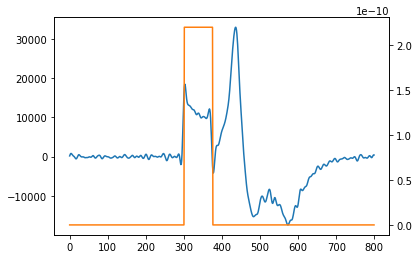

DRG/Single\2022-04-13_001_1.asc


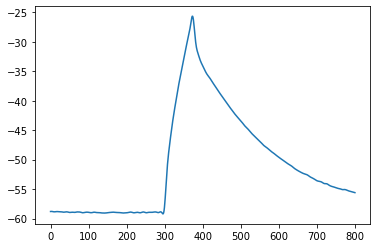

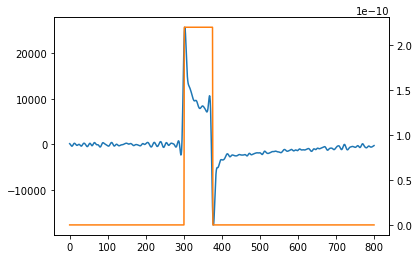

DRG/Single\2022-04-13_001_2.asc


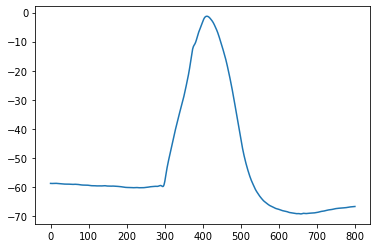

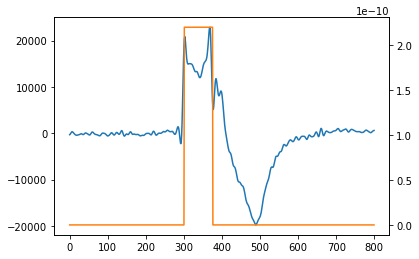

DRG/Single\2022-04-21_001_1.asc


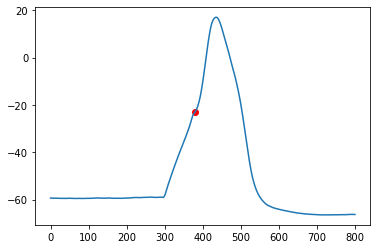

-27


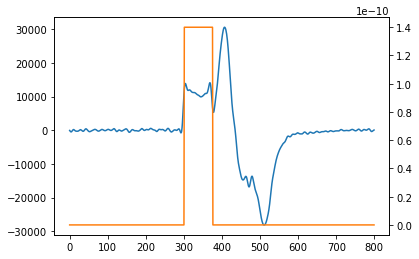

DRG/Single\2022_03_09_001_3.asc


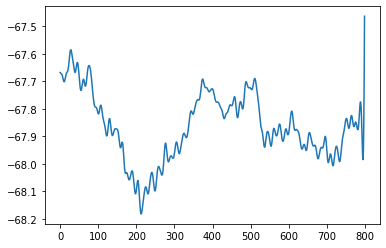

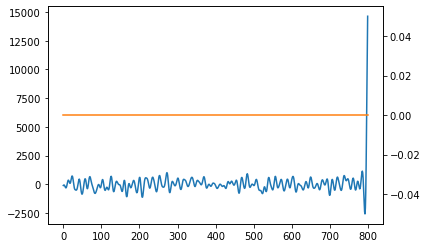

In [24]:
all_ap_properties = {'14dpi': get_ap_properties_all(dpi14_path),
                    '15dpi': get_ap_properties_all(dpi15_path),
                    '16dpi': get_ap_properties_all(dpi16_path),
                    '17dpi': get_ap_properties_all(dpi17_path),
                    'drg': get_ap_properties_all(drg_path)}

In [27]:
with open("AP_single.json", "w") as outfile:
    json.dump(all_ap_properties, outfile, indent=4)

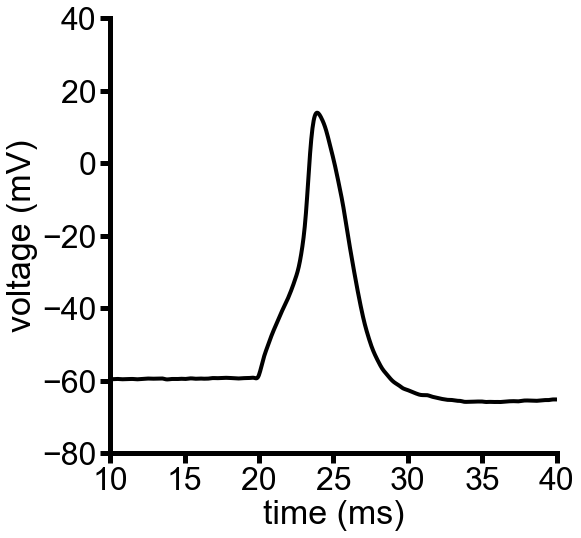

In [8]:
plt.figure(figsize=(8,8))
plt.plot(data_ap.time[3][200:1000]*1000, data_ap.voltage_filtered[4][200:1000], c='k',linewidth=4)


ax = plt.gca()
ax.set_xlim([10, 40])
ax.set_ylim([-80, 40])
ax.tick_params(length=6, width=4)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
ax.tick_params(length=10, width=5)
#ax.spines['left'].set_bounds(-800, -600)
plt.xticks(fontsize=32, fontname='Arial')
plt.yticks(fontsize=32, fontname='Arial')

plt.xlabel('time (ms)', fontsize=34, fontname='Arial')
plt.ylabel('voltage (mV)', fontsize=34,fontname='Arial')


plt.savefig('AP_60pA.png', bbox_inches = "tight")   
plt.show()  

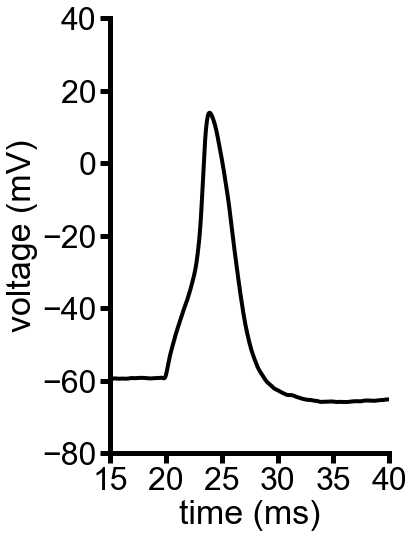

In [9]:
plt.figure(figsize=(5,8))
plt.plot(data_ap.time[3][200:1000]*1000, data_ap.voltage_filtered[4][200:1000], c='k',linewidth=4)


ax = plt.gca()
ax.set_xlim([15, 40])
ax.set_ylim([-80, 40])
ax.tick_params(length=6, width=4)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
ax.tick_params(length=10, width=5)
#ax.spines['left'].set_bounds(-800, -600)
plt.xticks(fontsize=32, fontname='Arial')
plt.yticks(fontsize=32, fontname='Arial')

plt.xlabel('time (ms)', fontsize=34, fontname='Arial')
plt.ylabel('voltage (mV)', fontsize=34,fontname='Arial')


plt.savefig('AP_60pA_repro.png', bbox_inches = "tight")   
plt.show() 

In [10]:
data_ap_drg = AP('DRG/Single/2022-03-17_001_2.asc')

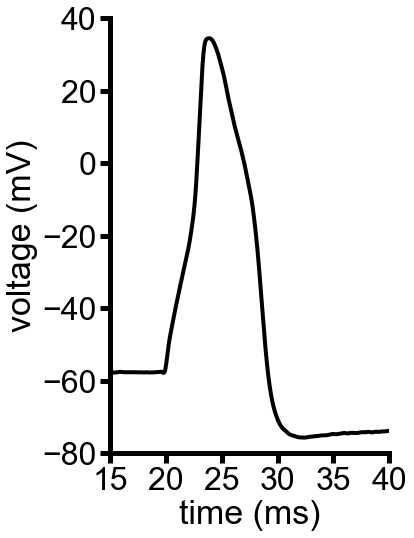

In [11]:
plt.figure(figsize=(5,8))
plt.plot(data_ap_drg.time[3][200:1000]*1000, data_ap_drg.voltage_filtered[11][200:1000], c='k',linewidth=4)


ax = plt.gca()
ax.set_xlim([15, 40])
ax.set_ylim([-80, 40])
ax.tick_params(length=6, width=4)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
ax.tick_params(length=10, width=5)
#ax.spines['left'].set_bounds(-800, -600)
plt.xticks(fontsize=32, fontname='Arial')
plt.yticks(fontsize=32, fontname='Arial')

plt.xlabel('time (ms)', fontsize=34, fontname='Arial')
plt.ylabel('voltage (mV)', fontsize=34,fontname='Arial')


plt.savefig('AP_DRG_220pA_repro.png', bbox_inches = "tight")   
plt.show() 